# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [2]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 100


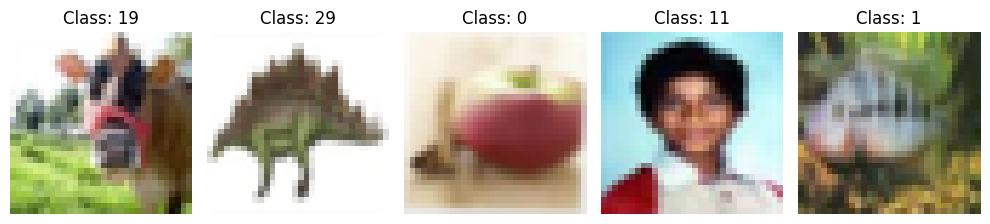

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Explore the dataset
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

# Display a few sample images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Class: {y_train[i][0]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [4]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize images to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Split training data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"Training data shape: {x_train.shape}, Validation data shape: {x_val.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (40000, 32, 32, 3), Validation data shape: (10000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the model
def create_enhanced_model():
    model = Sequential()

    # First Convolutional Block
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Second Convolutional Block
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Third Convolutional Block
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Flatten and Dense Layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(100, activation='softmax'))  # Output layer for 100 classes

    return model

# Instantiate and summarize the model
baseline_model = create_enhanced_model()
baseline_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          51,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,521,572 (9.62 MB)

 Trainable params: 2,520,676 (9.62 MB)

 Non-trainable params: 896 (3.50 KB)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [7]:
from tensorflow.keras.optimizers import Adam

# Compile the model
baseline_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [9]:
# Train the model
history = baseline_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=32
)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0524 - loss: 4.1919 - val_accuracy: 0.0948 - val_loss: 3.9082
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0642 - loss: 4.0864 - val_accuracy: 0.1191 - val_loss: 3.7515
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.0765 - loss: 3.9734 - val_accuracy: 0.1138 - val_loss: 3.7395
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0960 - loss: 3.8338 - val_accuracy: 0.1697 - val_loss: 3.4458
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1233 - loss: 3.6727 - val_accuracy: 0.2101 - val_loss: 3.2840
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1563 - loss: 3.4930 - val_accuracy: 0.1578 - val_loss: 3.6872
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1993 - loss: 3.2808 - val_accuracy: 0.2298 - val_loss: 3.1761
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.2433 - loss: 3.0232 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [10]:
# Evaluate the model on the test set
test_loss, test_accuracy = baseline_model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4577 - loss: 2.6045
Test Loss: 2.6101
Test Accuracy: 45.54%


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

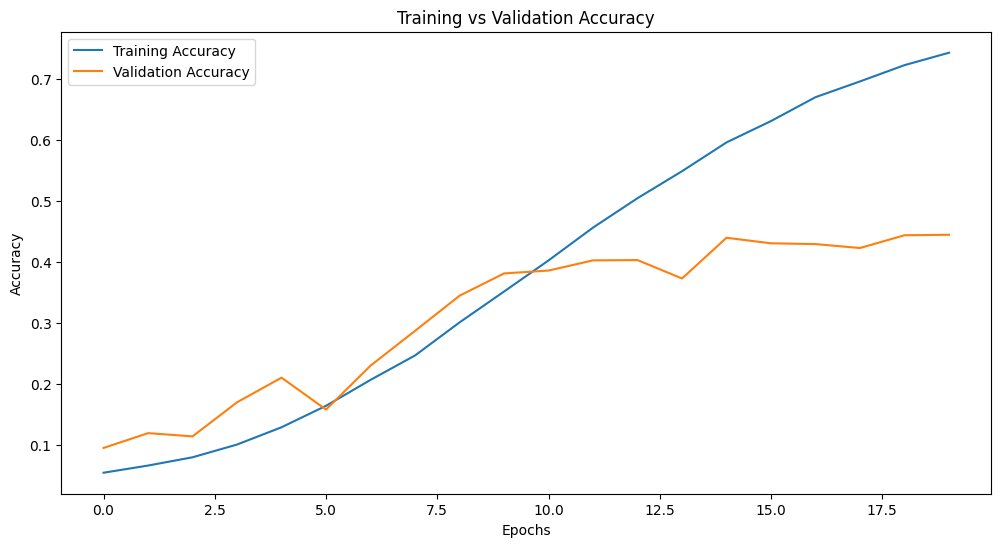

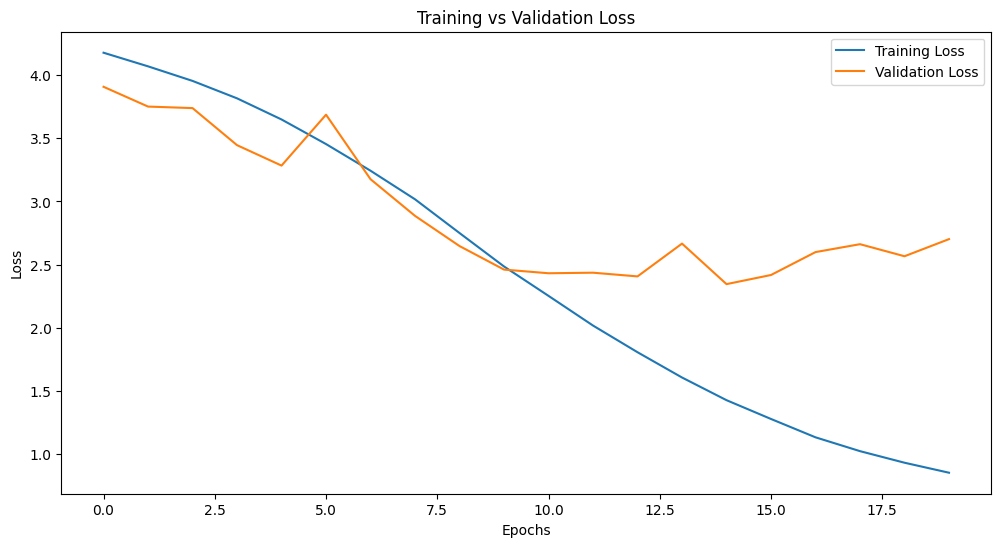

In [11]:
# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


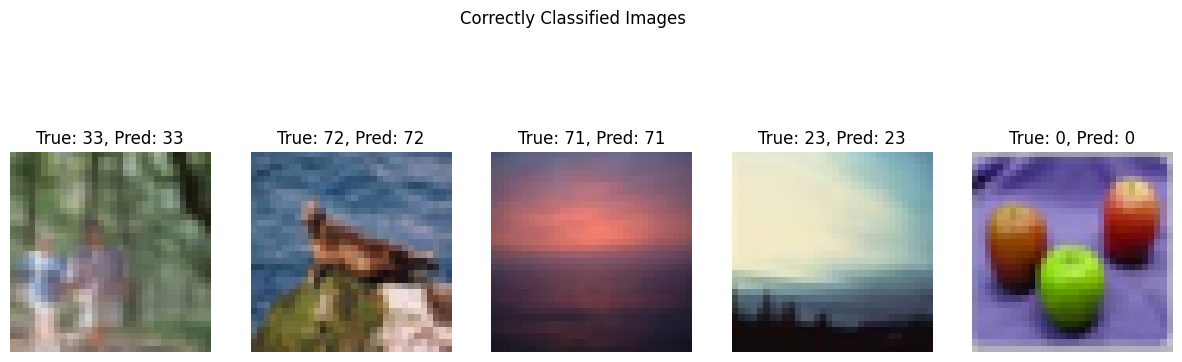

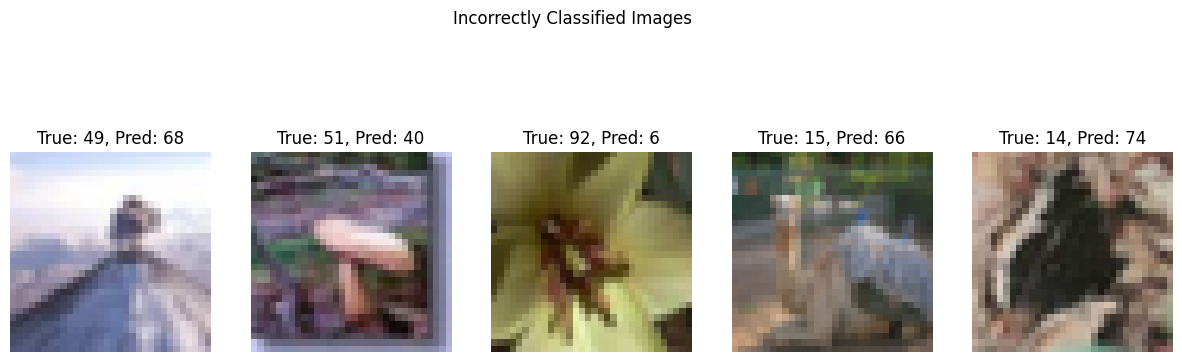

In [12]:
import numpy as np

# Generate predictions
y_pred = baseline_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Correct and incorrect indices
correct_indices = np.where(y_pred_classes == y_true)[0]
incorrect_indices = np.where(y_pred_classes != y_true)[0]

# Visualize correct predictions
plt.figure(figsize=(15, 5))
for i, idx in enumerate(correct_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.suptitle("Correctly Classified Images")
plt.show()

# Visualize incorrect predictions
plt.figure(figsize=(15, 5))
for i, idx in enumerate(incorrect_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.suptitle("Incorrectly Classified Images")
plt.show()

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping and learning rate scheduler callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Define the data augmentation generator
data_augmentation = ImageDataGenerator(
    rotation_range=15,       # Rotate images by up to 15 degrees
    width_shift_range=0.1,   # Horizontally shift images by up to 10% of width
    height_shift_range=0.1,  # Vertically shift images by up to 10% of height
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Fill any empty pixels
)

# Fit the model using the augmented data generator
history_augmented = baseline_model.fit(
    data_augmentation.flow(x_train, y_train, batch_size=32),  # Use augmented training data
    validation_data=(x_val, y_val),                           # Validation data remains the same
    epochs=20,                                                # Use the same number of epochs
    steps_per_epoch=len(x_train) // 32,                       # Steps per epoch based on batch size
    callbacks=[early_stopping, lr_scheduler]                  # Include callbacks for better optimization
)

# Evaluate the model with the test data
test_loss, test_accuracy = baseline_model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step - accuracy: 0.3473 - loss: 2.6686 - val_accuracy: 0.4434 - val_loss: 2.2024 - learning_rate: 0.0010
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4434 - val_loss: 2.2024 - learning_rate: 0.0010
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.4041 - loss: 2.3069 - val_accuracy: 0.4246 - val_loss: 2.3058 - learning_rate: 0.0010
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4246 - val_loss: 2.3058 - learning_rate: 0.0010
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.4413 - loss: 2.1430 - val_accuracy: 0.4478 - val_loss: 2.1924 - learning_rate: 5.0000e-04
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4478 - val_loss: 2.1924 - learning_rate: 5.0000e-04
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4602 - loss: 2.0525 - val_accuracy: 0.4595 - val_loss: 2.1985 - learning_rate: 5.0000e-04
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5124 - loss: 1.8524
Test Loss: 1.8450
Test Accuracy: 51.17%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:

              precision    recall  f1-score   support

     Class 0       0.76      0.80      0.78       100
     Class 1       0.61      0.62      0.61       100
     Class 2       0.42      0.36      0.39       100
     Class 3       0.35      0.29      0.32       100
     Class 4       0.28      0.27      0.27       100
     Class 5       0.47      0.48      0.48       100
     Class 6       0.55      0.65      0.59       100
     Class 7       0.48      0.62      0.54       100
     Class 8       0.48      0.63      0.55       100
     Class 9       0.68      0.69      0.69       100
    Class 10       0.43      0.29      0.35       100
    Class 11       0.35      0.33      0.34       100
    Class 12       0.57      0.56      0.56       100
    Class 13       0.36      0.47      0.41       100
    Clas

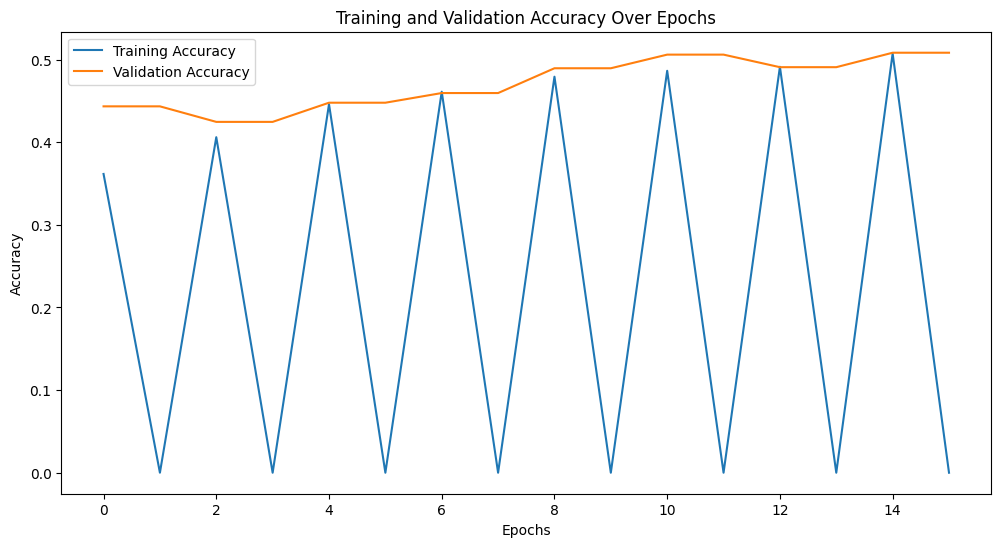

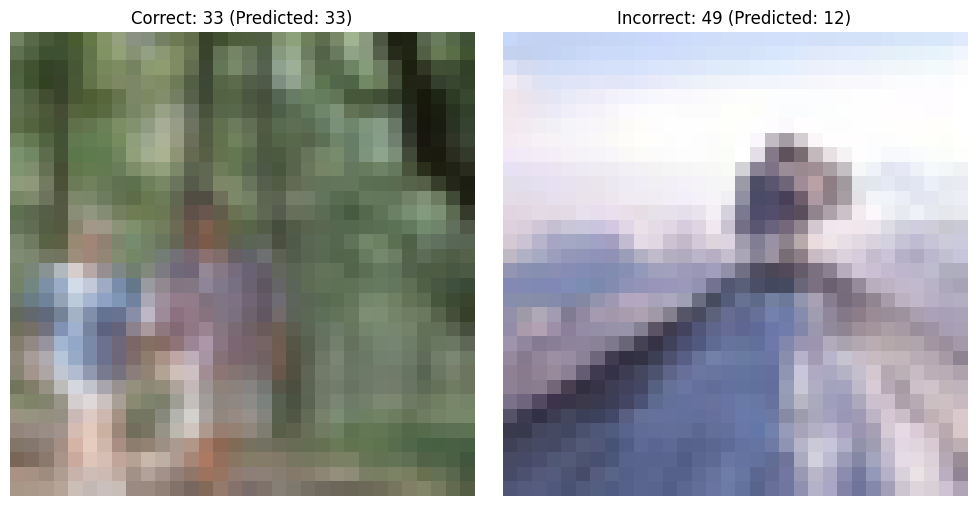

Probabilities for Correctly Classified Image:
[3.3043048e-05 4.5696137e-04 2.2632297e-05 7.3514520e-03 3.1253858e-03
 5.4126314e-05 2.8974314e-03 9.9726184e-04 4.2435419e-02 7.9880154e-04
 9.8174696e-06 2.1788319e-05 6.6650677e-03 2.3088895e-04 4.6614613e-04
 1.6258837e-03 2.3217293e-04 2.3916273e-03 1.3449343e-02 2.8620099e-03
 8.6388209e-06 1.2692887e-03 3.6589274e-05 1.3400156e-04 3.6093104e-06
 4.4600907e-04 9.9530400e-05 4.3410272e-03 7.3349664e-05 1.5628444e-02
 1.4900033e-04 7.1437344e-02 3.3133060e-03 1.8370683e-01 8.0727432e-03
 1.3787705e-04 5.7893332e-05 3.4605380e-02 2.5782542e-02 1.0215619e-03
 8.5710453e-05 1.0703814e-03 2.8296230e-02 1.4222505e-03 2.0266257e-03
 1.3752688e-03 4.1479868e-04 5.1453672e-03 5.8729918e-04 1.5137591e-04
 5.6227231e-03 7.5863167e-03 8.7381108e-03 3.9324832e-06 1.0344498e-03
 1.5905241e-03 5.7551187e-02 1.3321391e-03 1.1249978e-04 4.0160120e-02
 8.8605011e-05 1.3535275e-06 6.3208150e-05 9.7514335e-03 3.5532182e-03
 5.1279720e-03 4.2282604e-02 2.

In [16]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Evaluate the Enhanced Model on Test Data
test_loss, test_accuracy = baseline_model.evaluate(x_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 2: Calculate Additional Metrics (e.g., F1-Score)
# Get predictions
y_pred_probs = baseline_model.predict(x_test, verbose=1)  # Probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)          # Class predictions
y_true_classes = np.argmax(y_test, axis=1)                # True labels

# Classification Report
classification_rep = classification_report(
    y_true_classes, y_pred_classes, target_names=[f"Class {i}" for i in range(100)]
)
print("\nClassification Report:\n")
print(classification_rep)

# Step 3: Visualize Training and Validation Accuracy Over Epochs
plt.figure(figsize=(12, 6))
plt.plot(history_augmented.history['accuracy'], label='Training Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 4: Visualize Correctly and Incorrectly Classified Samples
# Identify correctly and incorrectly classified indices
correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

# Plot a Correctly Classified Image
plt.figure(figsize=(10, 5))
correct_idx = correct_indices[0]  # First correct sample
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"Correct: {y_true_classes[correct_idx]} (Predicted: {y_pred_classes[correct_idx]})")
plt.axis('off')

# Plot an Incorrectly Classified Image
incorrect_idx = incorrect_indices[0]  # First incorrect sample
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrect: {y_true_classes[incorrect_idx]} (Predicted: {y_pred_classes[incorrect_idx]})")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print Classification Probabilities for the Plotted Images
print(f"Probabilities for Correctly Classified Image:\n{y_pred_probs[correct_idx]}")
print(f"Probabilities for Incorrectly Classified Image:\n{y_pred_probs[incorrect_idx]}")

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

MY ANSWER:

Yes, the model improved and hit a test accuracy of ~51%. Data augmentation and cyclical learning rate made the difference.  Introducing these advanced techniques add variety to the training data helping it handle the unseen data better.  While the learning rates optimized the learning process.

Yes, transfer learning, like ResNet can increase accuracy.  Class weights (for underperforming classes) can be a consideration, and possibly fine tuning the data augmentation.

I'd consider transfer learning for sure, adding more epochs and applying early stopping methods.



## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.